In [78]:
import numpy as np
import pandas as pd

In [79]:
df=pd.read_csv(r'C:/Users/User/OneDrive/Desktop/heart dieases/heart_dataset.csv',encoding='unicode_escape')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [80]:
df = df.drop(columns=['education'])

In [81]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [82]:
# Define the binary columns
bin_cols = ["male", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]

# Fill missing values for binary features with the most frequent value (mode)
for col in bin_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Check if there are any remaining missing values
missing_values = df.isnull().sum()

In [83]:
# Fill missing values for numeric features
numeric_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


# Check if there are any remaining missing values
missing_values = df.isnull().sum()

In [84]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [85]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

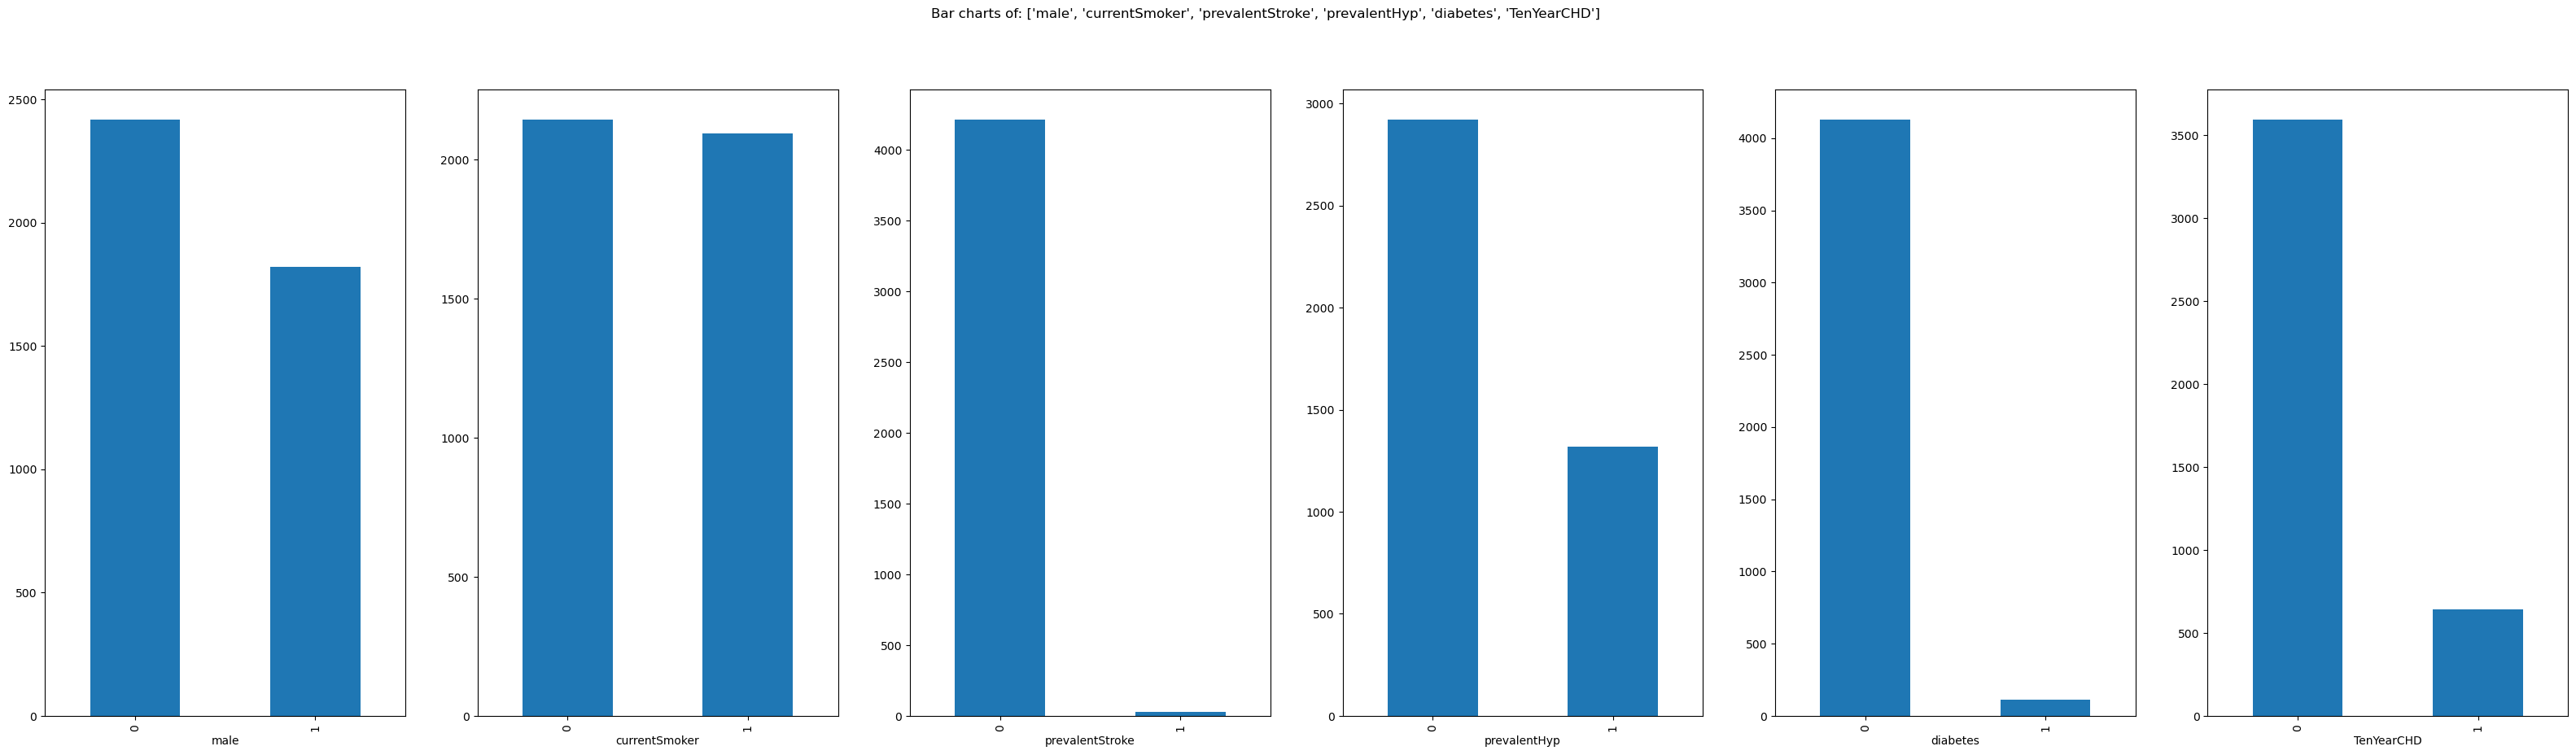

In [86]:
PlotBarCharts(inpData=df, colsToPlot=bin_cols)

In [87]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['TenYearCHD'] == 0]
df_minority = df[df['TenYearCHD'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [88]:
df_balanced['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

In [89]:
df = df.drop(columns=["prevalentStroke", "diabetes"])

In [90]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,1,185.0,141.0,98.0,25.60,67.0,72.0,0


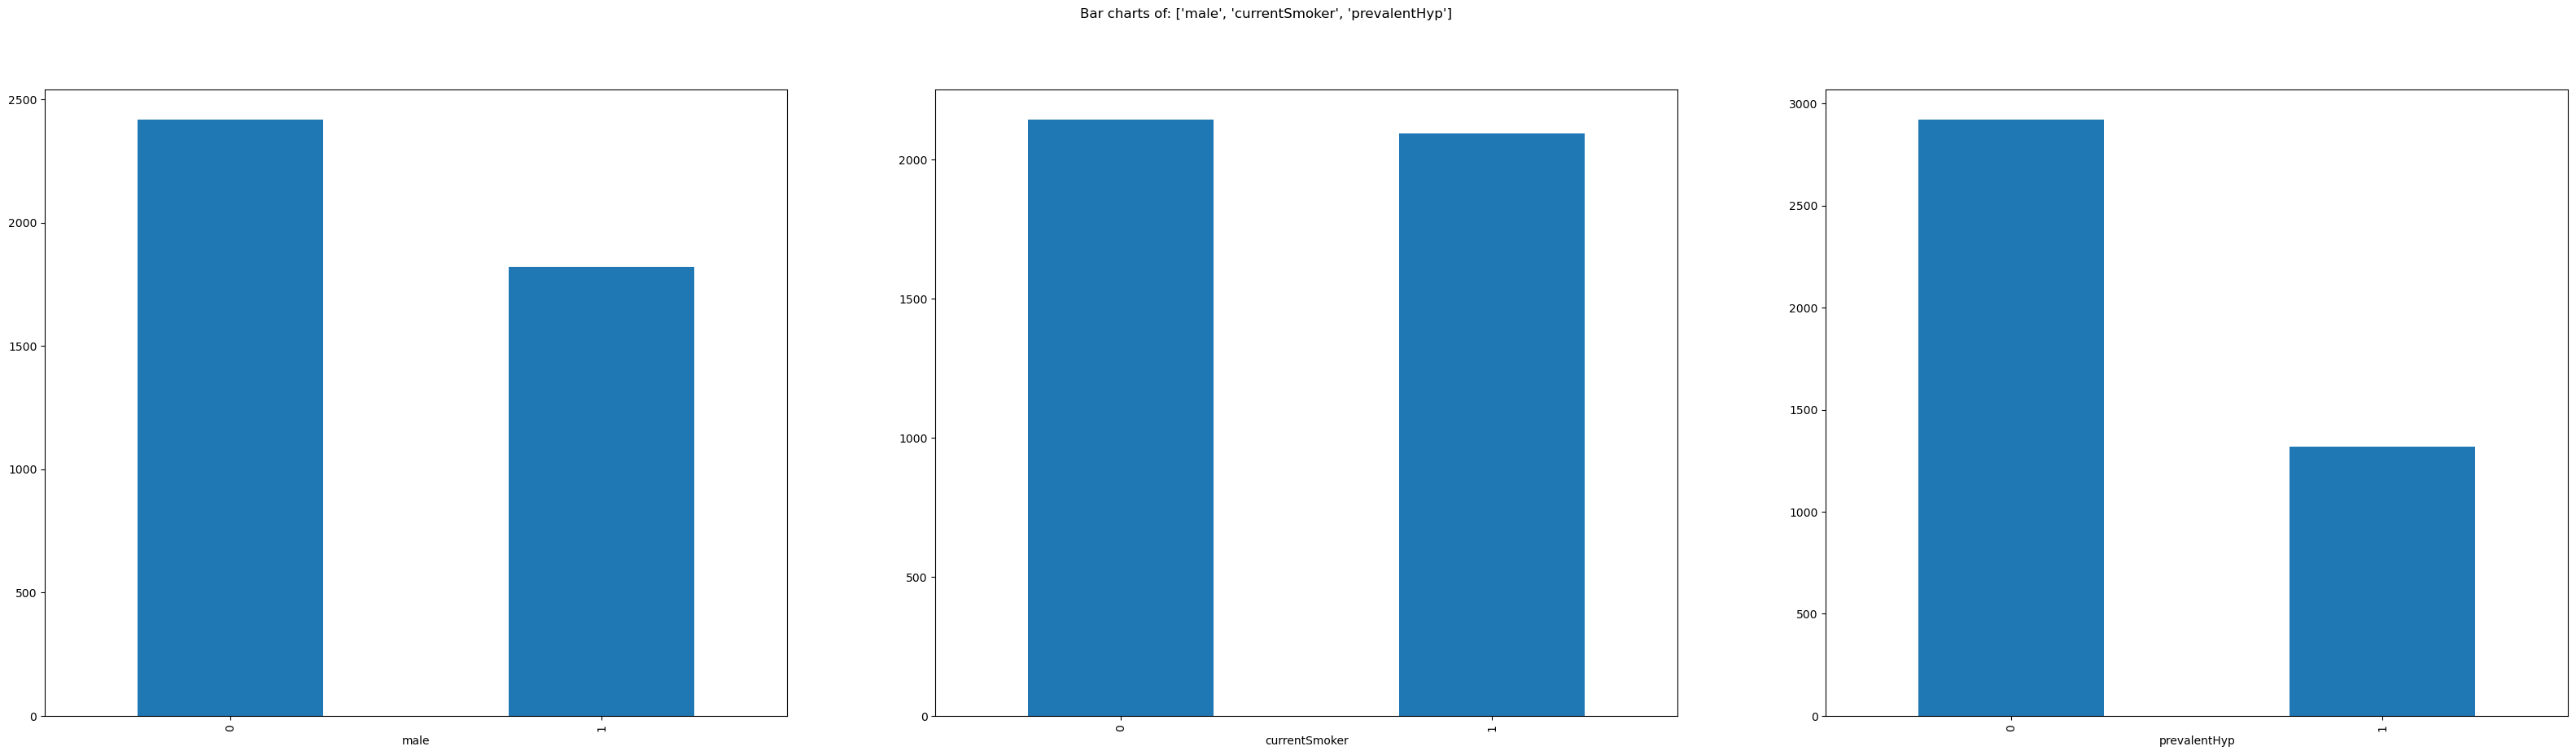

In [91]:
PlotBarCharts(inpData=df, colsToPlot=["male", "currentSmoker", "prevalentHyp"])

array([[<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>]], dtype=object)

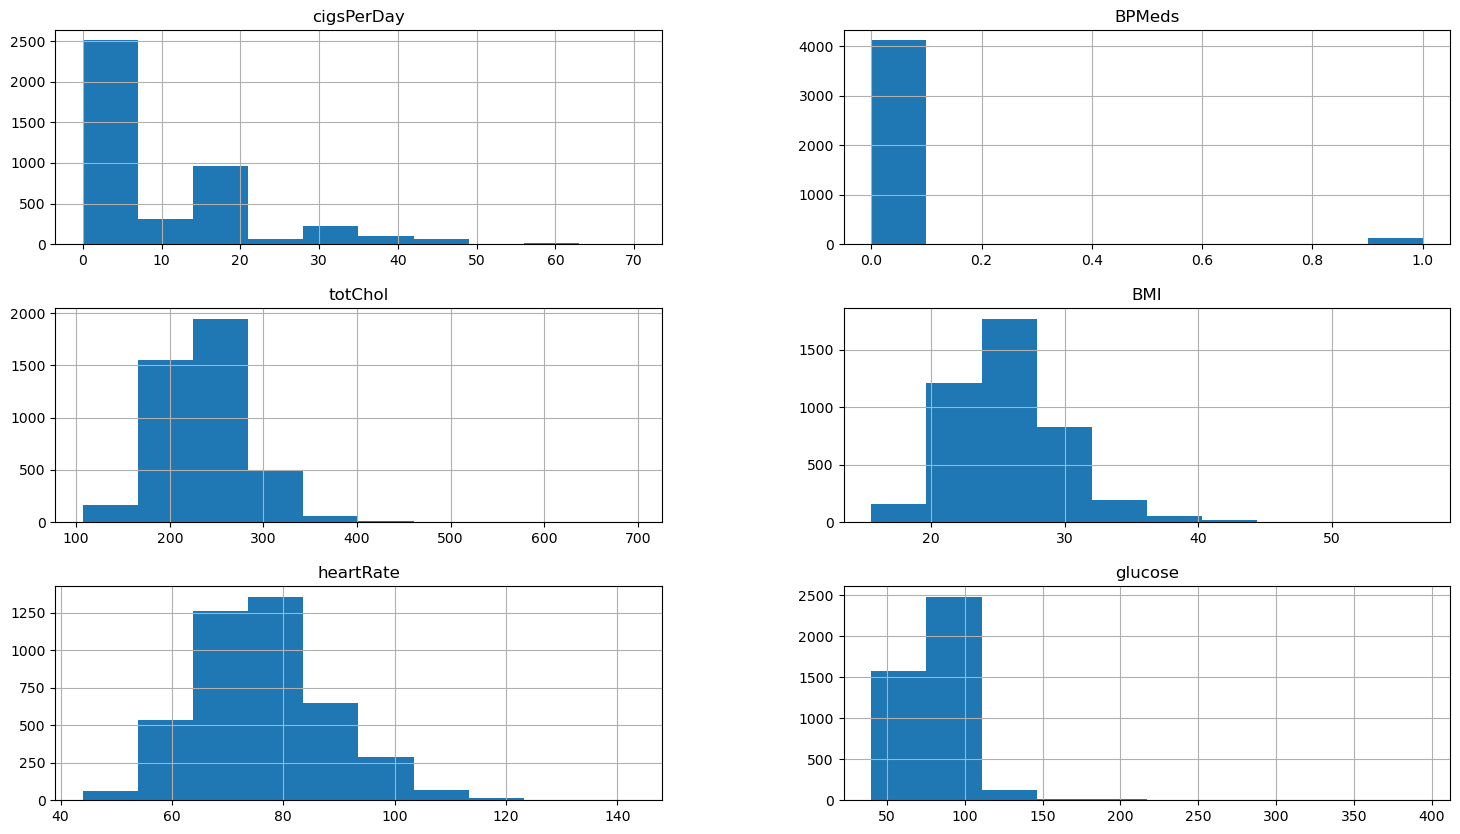

In [92]:
df.hist(["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"], figsize=(18,10))

In [93]:
df['cigsPerDay'][df['cigsPerDay']<50].sort_values(ascending=False)

447     45.0
2921    45.0
3769    45.0
2238    43.0
3139    43.0
        ... 
2707     0.0
2706     0.0
1292     0.0
2704     0.0
0        0.0
Name: cigsPerDay, Length: 4222, dtype: float64

In [94]:
df['cigsPerDay'][df['cigsPerDay']>50]=45

C:\Users\User\AppData\Local\Temp\ipykernel_10384\1214741170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cigsPerDay'][df['cigsPerDay']>50]=45


In [95]:
df['totChol'][df['totChol']<450].sort_values(ascending=False)

543     439.0
2985    432.0
1544    410.0
3806    410.0
1937    410.0
        ...  
1869    126.0
2443    124.0
4066    119.0
2525    113.0
1624    107.0
Name: totChol, Length: 4236, dtype: float64

In [96]:
df['totChol'][df['totChol']>450]=432

C:\Users\User\AppData\Local\Temp\ipykernel_10384\3918387599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totChol'][df['totChol']>450]=432


In [97]:
df['glucose'][df['glucose']<200].sort_values(ascending=False)

4042    193.0
4064    191.0
1238    186.0
3112    183.0
3606    177.0
        ...  
1419     44.0
2854     44.0
2225     43.0
1183     40.0
3975     40.0
Name: glucose, Length: 4206, dtype: float64

In [98]:
df['glucose'][df['glucose']>200]=185

C:\Users\User\AppData\Local\Temp\ipykernel_10384\1734446529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose'][df['glucose']>200]=185


array([[<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>]], dtype=object)

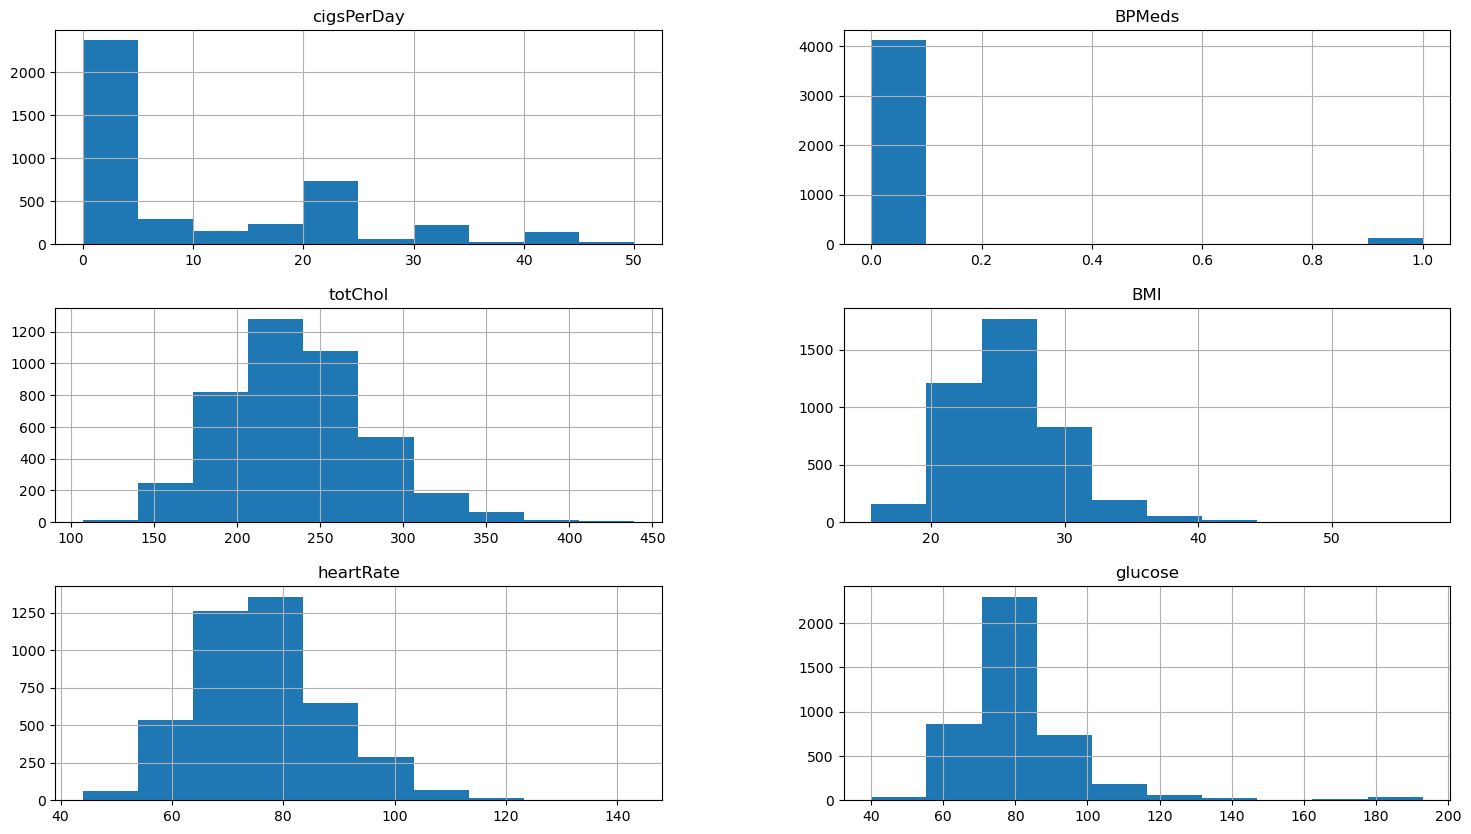

In [99]:
df.hist(["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"], figsize=(18,10))

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df_balanced.drop(columns=['TenYearCHD'])
y = df_balanced['TenYearCHD']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}


# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9715079916608756
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       735
           1       0.95      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439

Confusion Matrix for RandomForestClassifier:
[[699  36]
 [  5 699]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier Accuracy: 0.6719944405837387
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       735
           1       0.66      0.68      0.67       704

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

Confusion Matrix for AdaBoostClassifier:
[[486 249]
 [223 481]]
GradientBoostingClassifier Accuracy: 0.7289784572619875
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       735
           1       0.70      0.77      0.74       704

    accuracy                           0.73      1439
   macro avg       0.73      0.73      0.73      1439
weighted avg       0.73      0.73      0.73      1439

Confusion Matrix for GradientBoostingClassifier:
[[508 227]
 [163 541]]
Logist

In [105]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter=200),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
]

# Create a list to store the results
results = []

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to the list
    results.append({'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                    'Precision': precision, 'Recall': recall})

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

print(results_df)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                        Model  Accuracy  F1-Score  Precision    Recall
0      RandomForestClassifier  0.970813  0.970813   0.971773  0.970813
1          AdaBoostClassifier  0.671994  0.672015   0.672474  0.671994
2  GradientBoostingClassifier  0.728978  0.728702   0.731320  0.728978
3          LogisticRegression  0.658791  0.658830   0.659053  0.658791
4                         SVC  0.683113  0.683126   0.683656  0.683113
5        KNeighborsClassifier  0.787352  0.783833   0.812481  0.787352
6      DecisionTreeClassifier  0.915914  0.915520   0.927041  0.915914
7                  GaussianNB  0.583044  0.530092   0.635597  0.583044
8               XGBClassifier  0.906185  0.905977   0.912148  0.906185


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9749826268241835
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       735
           1       0.96      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.98      0.98      0.97      1439
weighted avg       0.98      0.97      0.97      1439

Confusion Matrix for Random Forest Classifier:
[[704  31]
 [  5 699]]


In [107]:
import pickle
pickle.dump(rf_classifier,open("rf_classifier.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))

In [108]:
# Load the RandomForestClassifier model
with open("rf_classifier.pkl", "rb") as file:
    rf_classifier = pickle.load(file)

# Load the scaler
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

In [109]:
def predict(model, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    # Encode categorical variables
    male_encoded = 1 if male.lower() == "male" else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == "yes" else 0
    BPMeds_encoded = 1 if BPMeds.lower() == "yes" else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == "yes" else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == "yes" else 0
    diabetes_encoded = 1 if diabetes.lower() == "yes" else 0
    
    # Prepare features array
    features = np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])
    
    # scalling
    scaled_features = scaler.transform(features)
    
    # predict by model
    result = model.predict(scaled_features)
    
    return result[0]

In [110]:
# test 1:
male = "female"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = 'no'
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00


result = predict(rf_classifier, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)


if result == 1:
    print("The Patient has Heart Diseas")
else: 
    print("The Patiennt has No Heart Deseas")

The Patiennt has No Heart Deseas


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [111]:
male = 'female'
age = 63.0
currentSmoker = 'yes'
cigsPerDay = 3.0
BPMeds = 'no'
prevalentStroke = 'no'
prevalentHyp = 'yes'
diabetes = 'no'
totChol = 267.0
sysBP = 156.5
diaBP = 92.5
BMI = 27.1
heartRate = 60.0
glucose = 79.0
result = 1.0



result = predict(rf_classifier, scaler, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)


if result == 1:
    print("The Patient has Heart Diseas")
else: 
    print("The Patiennt has No Heart Deseas")

The Patient has Heart Diseas


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
S